In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA

In [2]:
filelist = ['6-1.wav',
            '3-1.wav',
            '4-1.wav'
            ]
info = WAVreader(filelist, [0,1,2], 0.05)
data = info.dataset

14.6035
Scaled 963 windows down to 821
Finished file 6-1.wav
14.5955
Scaled 1285 windows down to 1004
Finished file 3-1.wav
14.6025
Scaled 806 windows down to 651
Finished file 4-1.wav

Final data set consists of 2464 windows over 3 classes


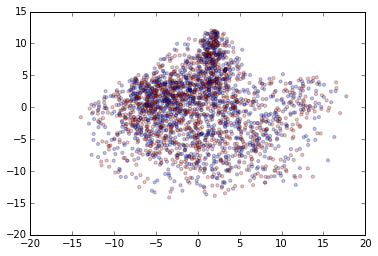

In [3]:
X = [dat[0] for dat in info.lnMFCCset]
labels = [(dat[1]+0.0)/info.length*2 for dat in info.lnMFCCset]
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.transform(X)
scatter([x[0] for x in newX], [x[1] for x in newX],c=[[1,0,0],[0,0,1]],alpha=0.25,s=10)

In [4]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 == 2: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(2464, 247)


In [33]:
NTN = ShallowNeuralNetwork(input_dim=79, hidden_dim=27)
# cProfile.run('NTN.train(trainset, maxiter=41, alpha=0.0001, lmbda=0.001, display_progress=True)')
NTN.train(trainset, maxiter=61, alpha=0.0001, lmbda=0.00001, display_progress=True)

completed iteration 0; error is 816.355296491; size is 0.169198378444
completed iteration 10; error is 781.709198366; size is 2.60751578775
completed iteration 20; error is 479.032737964; size is 10.3878533631
completed iteration 30; error is 430.740531399; size is 13.8978024171
completed iteration 40; error is 386.281682022; size is 17.5590493535
completed iteration 50; error is 338.02529494; size is 20.9726364689
completed iteration 60; error is 288.343043922; size is 23.6590567147


In [35]:
print NTN.accuracy(trainset), NTN.accuracy(testset)

0.919266055046 0.857142857143


In [9]:
SNN = SoftmaxNeuralNetwork(input_dim=79, output_dim=info.numClasses)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
# cProfile.run('SNN.train(trainset, maxiter=101, alpha=0.001, lmbda=.00001, display_progress=True)')
SNN.train(trainset, maxiter=201, alpha=0.001, lmbda=.0000, display_progress=True, anneal=lambda x: .1/(100+10*x))

completed iteration 0; error is 1435.0; size is 0.480310355704
completed iteration 10; error is 962.0; size is 1.76935610129
completed iteration 20; error is 876.0; size is 2.24947549002
completed iteration 30; error is 835.0; size is 2.55182293176
completed iteration 40; error is 841.0; size is 2.76892536334
completed iteration 50; error is 815.0; size is 2.96609207261
completed iteration 60; error is 809.0; size is 3.12996578019
completed iteration 70; error is 797.0; size is 3.24293616431
completed iteration 80; error is 797.0; size is 3.3567269175
completed iteration 90; error is 776.0; size is 3.46657680962
completed iteration 100; error is 796.0; size is 3.54089205873
completed iteration 110; error is 777.0; size is 3.60977348715
completed iteration 120; error is 798.0; size is 3.73771091006
completed iteration 130; error is 773.0; size is 3.77540618584
completed iteration 140; error is 773.0; size is 3.83780209412
completed iteration 150; error is 784.0; size is 3.91377804267
co

In [11]:
# 2-class, alpha=.001, lmbda=.0001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.754623364908 0.7004048583


In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

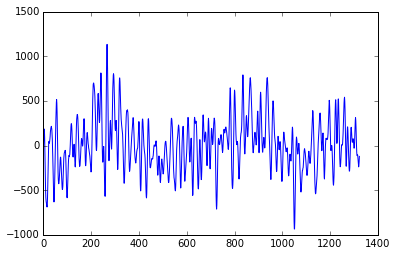

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()